### Logistic Regression using L1 (Lasso) and L2 (Ridge) Regularization 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df['waterfront'].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: waterfront, Length: 21613, dtype: int64>

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.drop(['id', 'date','waterfront'], axis=1, inplace = True)

In [7]:
df.drop(['view'], axis=1, inplace = True)

In [8]:
y= df.price.values
X= df.drop(['price'], axis=1)

### Build Lasso Model

In [9]:
modelL = Lasso(alpha=0.7,normalize= True)
modelL.fit(X,y)
print(modelL.score(X,y))

0.6615751874715873


In [10]:
np.round(modelL.coef_, 2)

array([-4.5761940e+04,  4.2791800e+04,  1.7931000e+02,  1.5000000e-01,
        1.0788160e+04,  2.9090010e+04,  1.0114982e+05,  7.8100000e+00,
        0.0000000e+00, -2.8241700e+03,  3.4770000e+01, -4.7281000e+02,
        5.5516647e+05, -2.5040073e+05,  4.0140000e+01, -3.1000000e-01])

### Plot the graph of features wrt the Coefficients

In [11]:
features = X.columns
features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

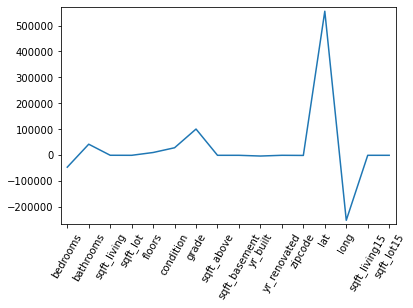

In [12]:
sns.lineplot(x= range(len(features)), y= modelL.coef_)
plt.xticks(range(len(features)), labels= features, rotation=60)
plt.margins(0.02)
plt.show

### Ridge

In [13]:
modelR = Ridge(alpha = 0.1, normalize=True )
modelR.fit(X,y)
print(modelR.score(X,y))

0.6583304524355043


In [14]:
np.round(modelR.coef_, 2)

array([-3.3796040e+04,  4.1302780e+04,  8.6970000e+01,  1.4000000e-01,
        1.3697970e+04,  3.1104470e+04,  8.7289240e+04,  8.3510000e+01,
        8.2160000e+01, -2.2933000e+03,  4.1160000e+01, -3.1660000e+02,
        5.2137926e+05, -2.2972168e+05,  5.6160000e+01, -2.3000000e-01])

<function matplotlib.pyplot.show(close=None, block=None)>

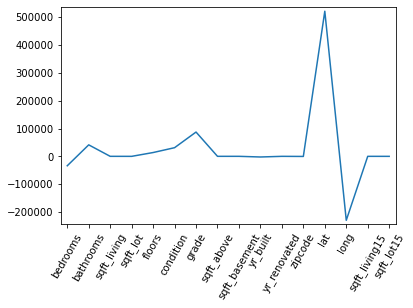

In [15]:
sns.lineplot(x= range(len(features)), y= modelR.coef_)
plt.xticks(range(len(features)), labels= features, rotation=60)
plt.margins(0.02)
plt.show

### Logistic Regression with Regularization

In [16]:
df1 = pd.read_csv("train_regularization.csv")
df1.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 371 entries, ID to TARGET
dtypes: float64(89), int64(282)
memory usage: 28.3 MB


In [18]:
#finding total null entries
df1.isnull().sum().sum()

0

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop(['TARGET'], axis=1)
                                                    ,df1['TARGET'],test_size=0.3,random_state=0)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1',solver='saga',C=0.8)
model.fit(scaled_X, Y_train)
model.score(scaled_X, Y_train)

/Users/manju/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.962

In [30]:
model1 = LogisticRegression(penalty='l2',solver='newton-cg',C=0.8)
model1.fit(scaled_X, Y_train)
model1.score(scaled_X, Y_train)

0.9627142857142857